## Task :Classification of Amazon-Reviews into two categories (Positive or Negative) Using    Naive-Bayes

About Dataset : Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

**The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon:**

    Number of reviews: 568,454  
    Number of users: 256,059
    Number of products: 74,258
    Timespan: Oct 1999 - Oct 2012
    Number of Attributes/Columns in data: 10 
    
**Attribute Information:**

    1) ProductId - unique identifier for the product
    2) UserId - unqiue identifier for the user
    3) ProfileName -Profile name of the customer
    4) HelpfulnessNumerator - number of users who found the review helpful
    5) HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
    6) Score - rating between 1 and 5
    7) Time - timestamp for the review
    8) Summary - brief summary of the review
    9) Text - text of the review
    
**Note :**
    
    Here we are purposefully ignoring reviews with score equals to 3 as there are Neutral , and if the score is above 3 then   the review will be set to "Positive" , otherwise it will be set to "Negative". Text is already pre-processed by removing       html tags ,duplicate entries, stopwords and punctuations.

**Reviews will be converted into Vector Representations like :**

    1) Bag of words 
    2) TF-IDF
   
 **Note:**
 
    we donot use avereage w2vec or tfidf- w2vec , because Naive-Bayes in Text classification donot consider negative values( w2vec values can be negative) and also Naive bayes works on conditional independence of features which incase of w2vec doesnot make sense.

In [1]:
#importing require libraries
#importing required libraries
%matplotlib inline
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#importing required data into pandas dataframe
amazon_data = pd.read_csv("Reviews_final.csv")


## Exploratory Data Analysis

In [2]:
#sorting the data based on time for time based spliting of data 
amazon_data_sorted = amazon_data.sort_values("Time",axis= 0 , ascending =False ,inplace =False ,
                                                     kind ="quicksort",na_position = "last")

In [3]:
#changing the timestamp column into standard time
amazon_data_sorted["Time"] = pd.to_datetime(amazon_data_sorted["Time"] , unit ="s")

In [4]:
amazon_data_sorted.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
345149,85816,B005XGH78E,A2YGWCOC3LM3KH,Luke R. McAllister,0,0,Positive,2012-10-26,Great flavor - spicy but not too hot,got low sodium food websit cant believ much fl...
287422,428155,B003XKF6CQ,A3IYSIAKYOMKTO,Renter,0,0,Positive,2012-10-26,Mellow,honey made blueberri blossom milder more mello...
339754,174906,B005J0N5ZI,AK42RQFIGJAEJ,Doodleoo,0,0,Positive,2012-10-26,OMG!!!,want start say holiday fanat love smell like h...


In [5]:
#reseting index value
amazon_data_sorted.reset_index(inplace=True ,drop =True)

In [13]:
#sampling 100000 data-points for further computation
amazon_data_sample = amazon_data_sorted.sample(n=100000)


In [14]:
#checking the number of datapoints and number of features
print("Number of rows in data =",amazon_data_sample.shape[0])
print("Number of columns in data =",amazon_data_sample.shape[1])

Number of rows in data = 100000
Number of columns in data = 10


In [15]:
#checking for the balance in the datset
print(amazon_data_sample["Score"].value_counts())

Positive    84296
Negative    15704
Name: Score, dtype: int64


In [16]:
#converting the claa_label into numeric with Positve_class labelled as "1" and Negative_class labelled as "0"

def score_numeric(s):
    if s =="Positive":
        return 1
    else:
        return 0
    
amazon_data_sample["Score"] = amazon_data_sample["Score"].map(score_numeric)

In [17]:
#chcecking the few samples 
amazon_data_sample.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
235900,83840,B000WFKPSU,A1WTFI6QVFNWL8,Dennis,3,3,1,2010-12-15,Miraculous!,let know miracl food dog chihuahua fifth foste...
268720,24857,B000G0EP78,A22QE2KJOGM48H,Charles P. Jerian,1,1,1,2010-05-15,Best tasting low carb flour substitute,ive tri make recip book use soy almond flour c...
142478,475386,B004ZBEN2Q,A3H4J3J391G5NI,"logicofwar00 ""Andrea S""",0,0,1,2011-11-26,Delicious and satisfying,got care packag deploy not huge beef jerkey fa...


In [18]:
#reseting index value
amazon_data_sample.reset_index(inplace=True ,drop =True)

## Most frequent words in Both Categories (important features)

In [19]:
#getting themost frequent words in both the categories(Positive and Negative)
#separating postive and negative reviews into separate dataframes 
amazon_data_positive =amazon_data_sample[amazon_data_sample["Score"] == 1]
amazon_data_negative = amazon_data_sample[amazon_data_sample["Score"] == 0]


i=0
positive_words =[]
negative_words = []

for sent in amazon_data_positive["Text"].values:
    for w in sent.split():
        positive_words.append(w)
        
    
for sent in amazon_data_negative["Text"].values:
    for w in sent.split():
          negative_words.append(w)
        
import nltk
positive_words_freq = nltk.FreqDist(positive_words)
negative_words_freq = nltk.FreqDist(negative_words)

print("the most common positive words:" , positive_words_freq.most_common(15))
print("the most common negative words:" , negative_words_freq.most_common(15))

the most common positive words: [('not', 40718), ('like', 38648), ('tast', 35943), ('good', 31580), ('flavor', 30652), ('love', 29514), ('great', 28897), ('use', 28509), ('product', 25285), ('veri', 25019), ('tri', 23879), ('tea', 23110), ('coffe', 21785), ('make', 20749), ('get', 19916)]
the most common negative words: [('not', 15119), ('tast', 9737), ('like', 9109), ('product', 7871), ('flavor', 5527), ('would', 4953), ('tri', 4877), ('veri', 4761), ('use', 4265), ('good', 4215), ('coffe', 3966), ('buy', 3903), ('get', 3805), ('order', 3531), ('tea', 3496)]


## Wordcloud Representation of Most Frequent Wrods

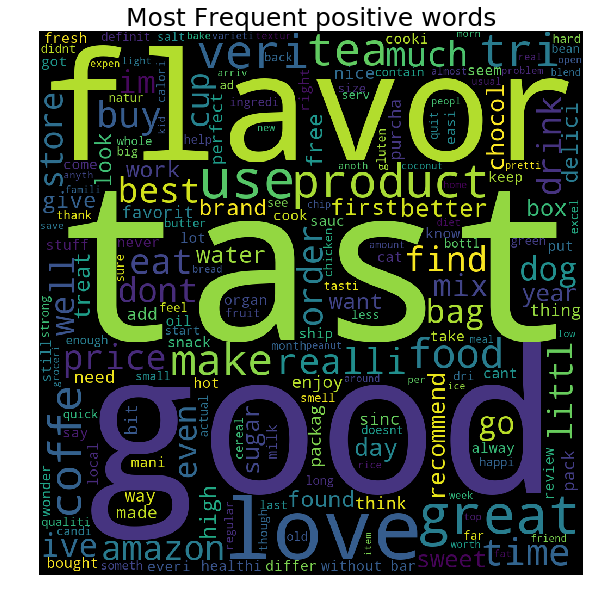

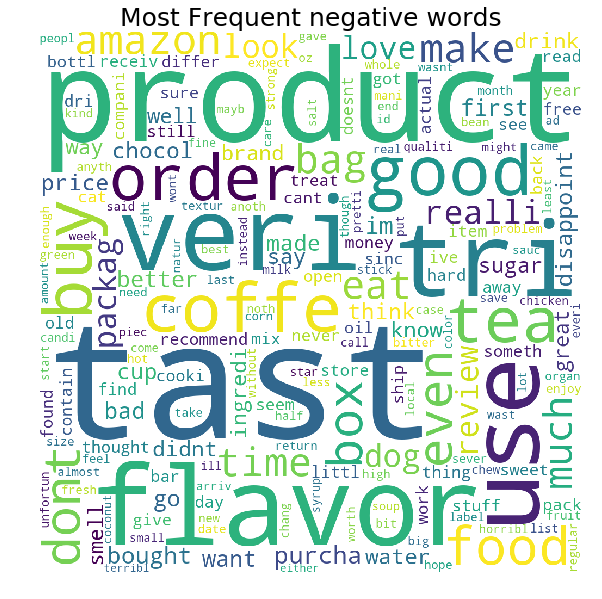

In [20]:
#ploting wordclouds to get most frequent words 
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))

positive_text = amazon_data_positive.Text.values
positive_cloud = WordCloud(stopwords=STOPWORDS,background_color='black',collocations=False,width=1000,height=1000
                         ).generate(" ".join(positive_text))
plt.axis('off')
plt.title("Most Frequent positive words",fontsize=25)
plt.imshow(positive_cloud)



#owrd cloud of most frequent negative words 
plt.figure(figsize=(10,10))
negative_text = amazon_data_negative.Text.values
negative_cloud = WordCloud(stopwords=STOPWORDS,background_color='white',collocations=False,width=1000
                           ,height=1000 ).generate(" ".join(negative_text))
plt.axis('off')
plt.title("Most Frequent negative words",fontsize=25)
plt.imshow(negative_cloud)

## Spliting Data Based in time

In [21]:
#taking first 70% data_points as training data and rest as test_data
train = amazon_data_sample.iloc[0:int(len(amazon_data_sample)*0.7),:]
test = amazon_data_sample.iloc[int(len(amazon_data_sample)*0.7):int(len(amazon_data_sample)),:]

train_text = train["Text"]
test_text = test["Text"]

## Bag of Words

In [22]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer

#initializing countvecotrizer and we are using bi_grams to secure the sequence information
NB_bow = CountVectorizer(ngram_range =(1,2) ,analyzer ="word", min_df = 5 ,max_features = None)
NB_bow.fit(train_text)

X_train_bow = NB_bow.transform(train_text)
X_test_bow = NB_bow.transform(test_text)
y_train = train["Score"]
y_test = test["Score"]


## Computing optimal laplace smoothing value using 10-fold cv

C:\Users\Gangadhar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


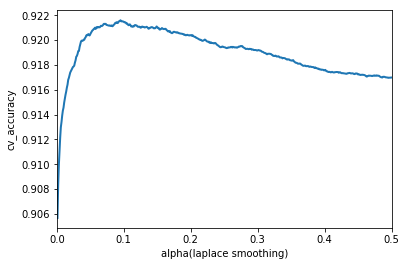

the optimal value for laplace smoothing is 0.095:


In [23]:
#importing required libraries 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB


#finding the optimal alpha value
alpha_list_bow = list(np.arange(10**-3,1.0,0.001))

cv_scores_bow = []

#performing 10-fold cross_validation to find optimal - aplha value

# perform 10-fold cross validation
for a in alpha_list_bow:
    NB_bow = MultinomialNB(alpha = a ,fit_prior =True ,class_prior =None)
    scores_bow = cross_val_score(NB_bow, X_train_bow, y_train, cv=10, scoring='accuracy')
    cv_scores_bow.append(scores_bow.mean())
    
    
    
#plot between cv_scores and alpha values
plt.plot(alpha_list_bow ,  cv_scores_bow ,linewidth = 2.0 , linestyle="-")
plt.xlim(0,0.5)
plt.ylabel("cv_accuracy")
plt.xlabel("alpha(laplace smoothing)")
plt.show()    
    
#getting the optimal_aplha-value
optimal_alpha_bow = alpha_list_bow[cv_scores_bow.index(max(cv_scores_bow))]
print("the optimal value for laplace smoothing is {}:".format(optimal_alpha_bow))

## Binary Classification using Naive-Bayes Classifier on Bag of words

In [24]:
#initializing Naive bayes to find test_accuracy with optimal laplace smoothing
NB_bow = MultinomialNB(alpha = optimal_alpha_bow ,fit_prior =True ,class_prior =None)

#fitting the NB model
NB_bow.fit(X_train_bow,y_train)

#predicting for test_data 
NB_pred_bow = NB_bow.predict(X_test_bow)

NB_pred_train_bow = NB_bow.predict(X_train_bow)


#computing accuracy on test_data 
acc_NB_bow = accuracy_score(y_test,NB_pred_bow)*100
test_error_bow = (100-acc_NB_bow)
train_error_bow =( 1-accuracy_score(y_train,NB_pred_train_bow))*100
                  
                  
print("test accuracy using NB : {0:.2f}%" .format(round(acc_NB_bow,2)))
print("test error using NB : {0:.2f}%" .format(round(test_error_bow,2)))
print("train error using NB : {0:.2f}%" .format(round(train_error_bow,2)))

   


test accuracy using NB : 91.93%
test error using NB : 8.07%
train error using NB : 3.71%


In [43]:
#getting precision,recall,f1-score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_bow = precision_score(y_test,NB_pred_bow)*100
recall_bow = recall_score(y_test,NB_pred_bow)*100
f1_bow = f1_score(y_test,NB_pred_bow)*100



def confusion_matrix_values(m, n):
    cm = confusion_matrix(m, n)
    return(cm[0][0], cm[0][1],
            cm[1][0], cm[1][1])  


TN, FN, FP, TP = confusion_matrix_values(y_test, NB_pred_bow)


print("precision score using NB classifier is : {0:.2f}%".format(round(precision_bow,2)))

print("Recall score using NB classifier is : {0:.2f}%" .format(round(recall_bow,2)))

print("F1-score using Nb classifier is : {0:.2f}%".format(round(f1_bow,2)))

print('True positive = {}'.format(TP))
print('False positive = {}'.format(FP))
print('False negative = {}'.format(FN))
print('True negative = {}'.format(TN))


precision score using NB classifier is : 95.09%
Recall score using NB classifier is : 95.34%
F1-score using Nb classifier is : 95.22%
True positive = 24093
False positive = 1178
False negative = 1243
True negative = 3486


## Conclusions:

In [28]:
#reporting the results in a table
from prettytable import PrettyTable

t= PrettyTable()

t.field_names =["metric/Parameter" , "result"]

t.add_row (["Model" ,"Classification"])
t.add_row (["Classifier" ,"Naive-Bayes"])
t.add_row  (["Optimal_alpha" , optimal_alpha_bow])
t.add_row(["test accuracy" ,round(acc_NB_bow,2)])
t.add_row (["Train_error" ,round(train_error_bow,2)])
t.add_row (["Test error" , round(test_error_bow,2)])

In [29]:
print(t)

+------------------+----------------+
| metric/Parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Classifier    |  Naive-Bayes   |
|  Optimal_alpha   |     0.095      |
|  test accuracy   |     91.93      |
|   Train_error    |      3.71      |
|    Test error    |      8.07      |
+------------------+----------------+


## TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#initializing tfidfvectorizer 
NB_tfidf = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2' ,min_df =5)
NB_tfidf.fit(train_text)

X_train_tfidf = NB_tfidf.transform(train_text)
X_test_tfidf = NB_tfidf.transform(test_text)
y_train = train["Score"]
y_test = test["Score"]

## Computing optimal laplace smoothing value using 10-fold cv

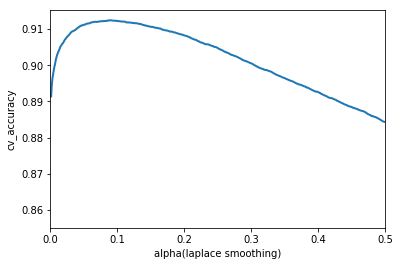

the optimal value for laplace smoothing is 0.089:


In [31]:
#importing required libraries 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB


#finding the optimal alpha value
alpha_list_tfidf = list(np.arange(10**-3,1.0,0.001))

cv_scores_tfidf = []

#performing 10-fold cross_validation to find optimal - aplha value

# perform 10-fold cross validation
for a1 in alpha_list_tfidf:
    NB_tfidf = MultinomialNB(alpha = a1 ,fit_prior =True ,class_prior =None)
    scores_tfidf = cross_val_score(NB_tfidf, X_train_tfidf, y_train, cv=10, scoring='accuracy')
    cv_scores_tfidf.append(scores_tfidf.mean())
    
    
    
#plot between cv_scores and alpha values
plt.plot(alpha_list_tfidf ,  cv_scores_tfidf ,linewidth = 2.0 , linestyle="-")
plt.xlim(0,0.5)
plt.ylabel("cv_accuracy")
plt.xlabel("alpha(laplace smoothing)")
plt.show()
    
    
#getting the optimal_aplha-value
optimal_alpha_tfidf = alpha_list_tfidf[cv_scores_tfidf.index(max(cv_scores_tfidf))]
print("the optimal value for laplace smoothing is {}:".format(optimal_alpha_tfidf))

## Binary Classification using Naive-Bayes Classifier on TF-IDF

In [32]:
#initializing Naive bayes to find test_accuracy with optimal laplace smoothing
NB_tfidf = MultinomialNB(alpha = optimal_alpha_tfidf ,fit_prior =True ,class_prior =None)

#fitting the NB model
NB_tfidf.fit(X_train_tfidf,y_train)

#predicting for test_data 
NB_pred_tfidf = NB_tfidf.predict(X_test_tfidf)

NB_pred_train_tfidf = NB_tfidf.predict(X_train_tfidf)


#computing accuracy on test_data 
acc_NB_tfidf = accuracy_score(y_test,NB_pred_tfidf)*100
test_error_tfidf = (100-acc_NB_tfidf)
train_error_tfidf =( 1-accuracy_score(y_train,NB_pred_train_tfidf))*100
                  
                  
print("test accuracy using NB : {0:.2f}%" .format(round(acc_NB_tfidf,2)))
print("test error using NB : {0:.2f}%" .format(round(test_error_tfidf,2)))
print("train error using NB : {0:.2f}%" .format(round(train_error_tfidf,2)))

   


test accuracy using NB : 91.13%
test error using NB : 8.87%
train error using NB : 4.04%


In [44]:
#getting precision,recall,f1-score and confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision_tfidf = precision_score(y_test,NB_pred_tfidf)*100
recall_tfidf = recall_score(y_test,NB_pred_tfidf)*100
f1_tfidf = f1_score(y_test,NB_pred_tfidf)*100



def confusion_matrix_values(v, u):
    cm = confusion_matrix(v, u)
    return(cm[0][0], cm[0][1],
            cm[1][0], cm[1][1])  


TN1, FN1, FP1, TP1 = confusion_matrix_values(y_test, NB_pred_tfidf)


print("precision score using NB classifier is : {0:.2f}%".format(round(precision_tfidf,2)))

print("Recall score using NB classifier is : {0:.2f}%" .format(round(recall_tfidf,2)))

print("F1-score using Nb classifier is : {0:.2f}%".format(round(f1_tfidf,2)))

print('True positive = {}'.format(TP1))
print('False positive = {}'.format(FP1))
print('False negative = {}'.format(FN1))
print('True negative = {}'.format(TN1))

precision score using NB classifier is : 91.27%
Recall score using NB classifier is : 98.93%
F1-score using Nb classifier is : 94.95%
True positive = 25000
False positive = 271
False negative = 2391
True negative = 2338


In [34]:
#reporting the results in a table
from prettytable import PrettyTable

t1= PrettyTable()

t1.field_names =["metric/Parameter" , "result"]

t1.add_row(["Model" ,"Classification"])
t1.add_row (["Classifier" ,"Naive-Bayes"])
t1.add_row  (["Optimal_alpha" , optimal_alpha_tfidf])
t1.add_row(["test accuracy",round(acc_NB_tfidf,2)])
t1.add_row  (["Train_error" ,round(train_error_tfidf,2)])
t1.add_row  (["Test error" , round(test_error_tfidf,2)])

## Conclusions:

In [35]:
print(t1)

+------------------+----------------+
| metric/Parameter |     result     |
+------------------+----------------+
|      Model       | Classification |
|    Classifier    |  Naive-Bayes   |
|  Optimal_alpha   |     0.089      |
|  test accuracy   |     91.13      |
|   Train_error    |      4.04      |
|    Test error    |      8.87      |
+------------------+----------------+
